### UFOOD Marketing Data Analysis Project

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
food = pd.read_csv(r'C:\Users\User\Downloads\u_food_marketing.csv')
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
pd.set_option('display.max.columns', 40)
pd.set_option('display.max.rows',2300)

In [8]:
food[food.duplicated()].sum()

Income                  9366769.0
Kidhome                      79.0
Teenhome                     87.0
Recency                    9277.0
MntWines                  55672.0
MntFruits                  4936.0
MntMeatProducts           28906.0
MntFishProducts            7256.0
MntSweetProducts           4708.0
MntGoldProds               8380.0
NumDealsPurchases           403.0
NumWebPurchases             725.0
NumCatalogPurchases         488.0
NumStorePurchases          1104.0
NumWebVisitsMonth           975.0
AcceptedCmp3                 12.0
AcceptedCmp4                  9.0
AcceptedCmp5                 15.0
AcceptedCmp1                  9.0
AcceptedCmp2                  4.0
Complain                      1.0
Z_CostContact               552.0
Z_Revenue                  2024.0
Response                     22.0
Age                        9358.0
Customer_Days            464574.0
marital_Divorced             16.0
marital_Married              69.0
marital_Single               34.0
marital_Togeth

In [9]:
food.drop_duplicates(keep = False, inplace = True)

In [10]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                1843 non-null   float64
 1   Kidhome               1843 non-null   int64  
 2   Teenhome              1843 non-null   int64  
 3   Recency               1843 non-null   int64  
 4   MntWines              1843 non-null   int64  
 5   MntFruits             1843 non-null   int64  
 6   MntMeatProducts       1843 non-null   int64  
 7   MntFishProducts       1843 non-null   int64  
 8   MntSweetProducts      1843 non-null   int64  
 9   MntGoldProds          1843 non-null   int64  
 10  NumDealsPurchases     1843 non-null   int64  
 11  NumWebPurchases       1843 non-null   int64  
 12  NumCatalogPurchases   1843 non-null   int64  
 13  NumStorePurchases     1843 non-null   int64  
 14  NumWebVisitsMonth     1843 non-null   int64  
 15  AcceptedCmp3          1843

In [11]:
food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis= 1)

In [12]:
food[food['Marital_Status']!= 0].head()

KeyError: 'Marital_Status'

In [ ]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

In [ ]:
food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis =1)

In [ ]:
food['Marital_Status_str'] = food['Marital_Status'].map({5:'Divorced',4: 'Married', 3:'Single', 2:'Together', 1:'Widow'})

In [ ]:
food.info()

In [ ]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})

In [ ]:
food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis =1)

In [ ]:
food[food['Education_Status']!=0].head()

In [18]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Response']].sum(axis=1)

In [21]:
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)

In [23]:
food.corr(method ='pearson',numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
marital_Together       -0.022349
Complain               -0.025798
education_

In [25]:
food[food['Accepted_Campaigns']!=0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,...,3,11,1,46,2547,0,0,0,1,0,0,0,0,0,1,44,42,0,1,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,...,3,11,0,70,2267,0,0,0,1,0,0,0,0,0,1,36,23,1,2,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,...,3,11,0,71,2617,0,1,0,0,0,0,0,0,1,0,1606,1430,1,1,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,...,3,11,0,71,2712,0,1,0,0,0,0,0,0,0,1,953,934,1,1,1


<Axes: >

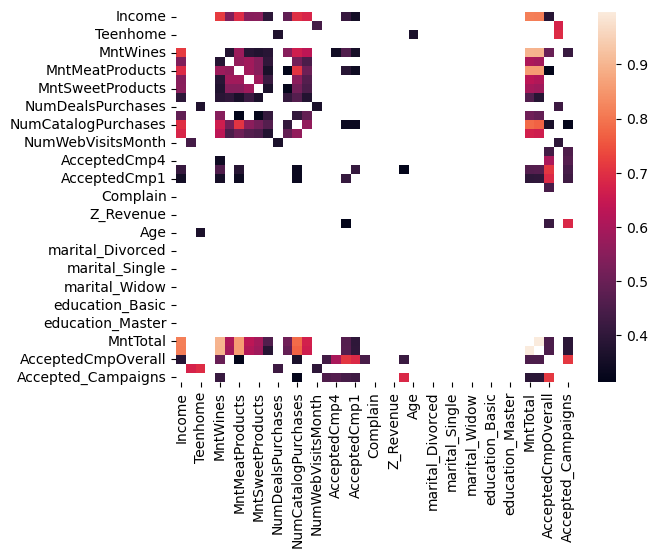

In [27]:
all_correlations = food.corr(method ='pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]

sns.heatmap(all_correlations)

In [28]:
all_correlations['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [29]:
age_groups =[(23,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

In [33]:
def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
                 return f"{age_range[0]} - {age_range[1]}"
    return("unknown")
food['Age_Group'] = food['Age'].apply(assign_age_group)

In [35]:
food[['Age',"Age_Group"]].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

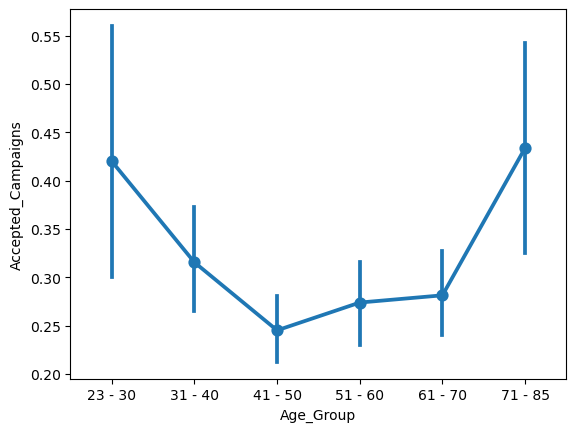

In [37]:
age_order =['23 - 30','31 - 40','41 - 50','51 - 60','61 - 70','71 - 85']
sns.pointplot(data = food, x= "Age_Group", y ="Accepted_Campaigns", order = age_order )

In [39]:
counts = food['Age_Group'].value_counts()

In [41]:
percentage =  counts / food.shape[0]

In [43]:
percent_food = percentage.reset_index()

In [45]:
percent_food.columns = ['age_group','percentage']

In [47]:
percent_food.sort_values(by= 'age_group', ascending = False)

,age_group,percentage
4,71 - 85,0.045035
2,61 - 70,0.212154
1,51 - 60,0.221921
0,41 - 50,0.332067
3,31 - 40,0.161693
5,23 - 30,0.027130


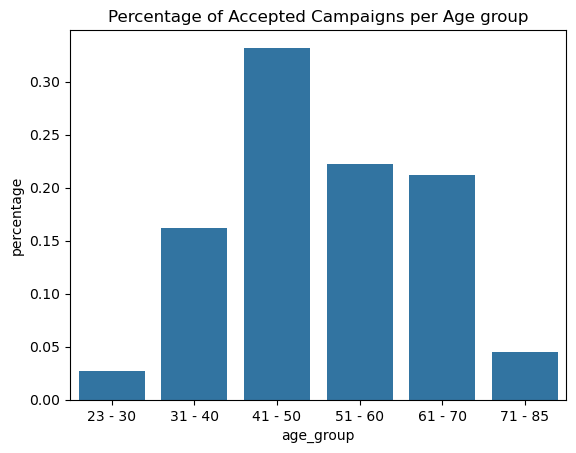

Text(0, 0.5, 'Frequency')

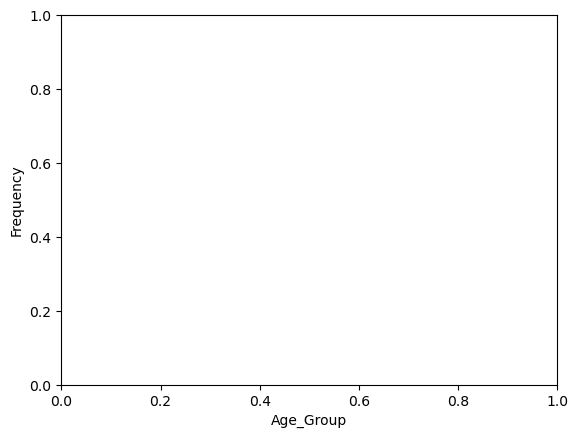

In [49]:
plt.title('Data Visualization')
sns.barplot(x= 'age_group', y ='percentage', data = percent_food, order= age_order)
plt.title('Percentage of Accepted Campaigns per Age group')
plt.show()
plt.xlabel('Age_Group')
plt.ylabel('Frequency')

In [51]:
# Age segmantation - core audience for accepting campaigns right now is 31 - 70

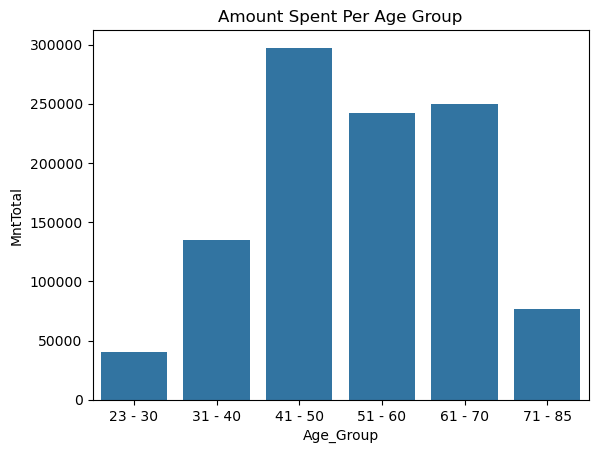

Text(0, 0.5, 'Frequency')

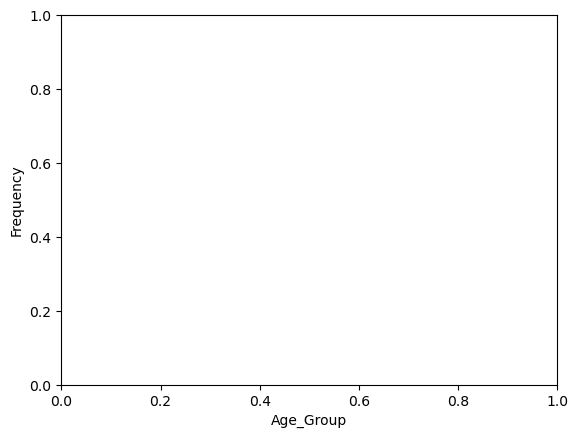

In [53]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
plt.title('Data Visualization')
sns.barplot(x= 'Age_Group', y ='MntTotal', data = grouped_food, order= age_order)
plt.title('Amount Spent Per Age Group')
plt.show()
plt.xlabel('Age_Group')
plt.ylabel('Frequency')

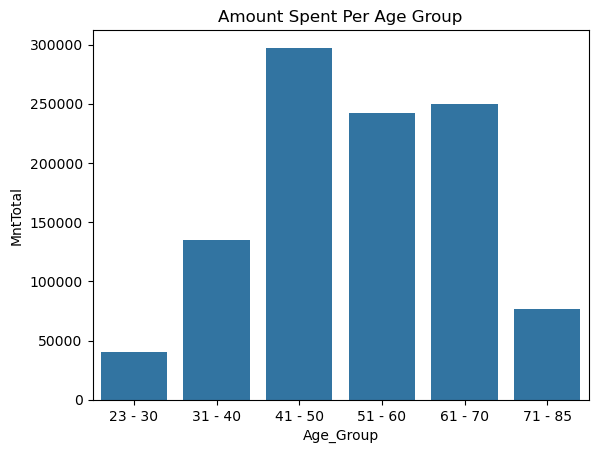

Text(0, 0.5, 'Frequency')

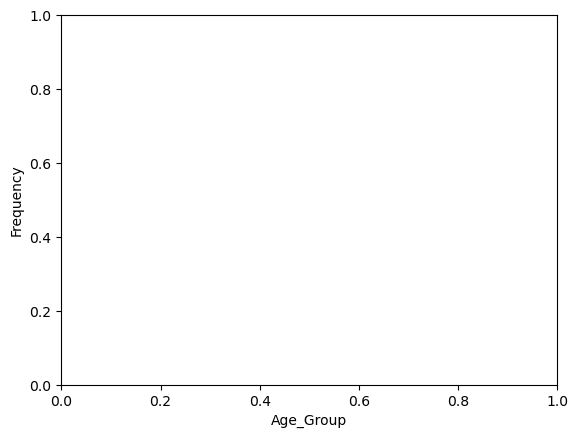

In [54]:
food[food['Accepted_Campaigns']!=0]

grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
plt.title('Data Visualization')
sns.barplot(x= 'Age_Group', y ='MntTotal', data = grouped_food, order= age_order)
plt.title('Amount Spent Per Age Group')
plt.show()
plt.xlabel('Age_Group')
plt.ylabel('Frequency')

In [57]:
# Age segmantation - core audience for accepting campaigns right now is 31 - 70. 23-30m 71 and up accept higher rates

In [59]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,...,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,...,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,...,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,...,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,...,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1,0,31 - 40


In [61]:
sum_food = pd.DataFrame(food[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns =['Sum'])

In [63]:
sum_food = sum_food.reset_index()

In [65]:
sum_food.rename(columns = {'index':'Type_of_purchase'},inplace = True)

In [67]:
sum_food

,Type_of_purchase,Sum
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


Text(0, 0.5, 'Frequency')

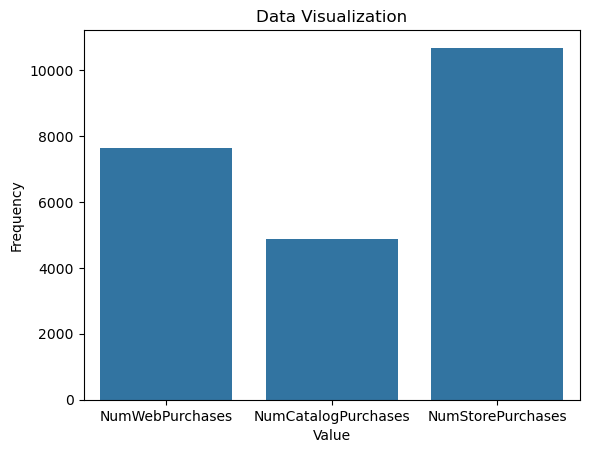

In [69]:
plt.title('Data Visualization')
sns.barplot(x = 'Type_of_purchase', y = 'Sum', data = sum_food)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [70]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

In [73]:
sum_food = pd.DataFrame(acct_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns =['Sum'])

In [75]:
sum_food = sum_food.reset_index()

In [77]:
sum_food.rename(columns = {'index':'Type_of_purchase'},inplace = True)

Text(0, 0.5, 'Frequency')

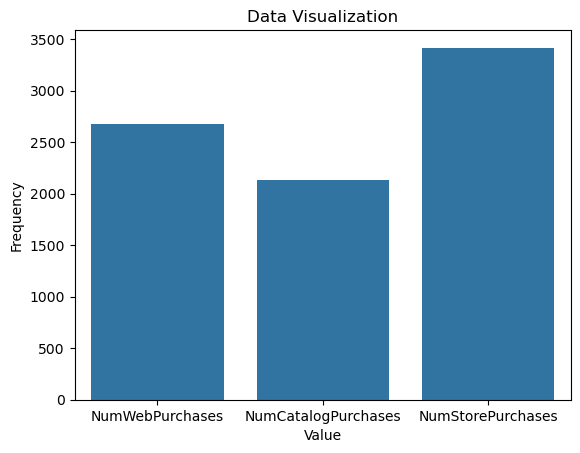

In [79]:
plt.title('Data Visualization')
sns.barplot(x = 'Type_of_purchase', y = 'Sum', data = sum_food)
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(37.597222222222214, 0.5, 'Frequency')

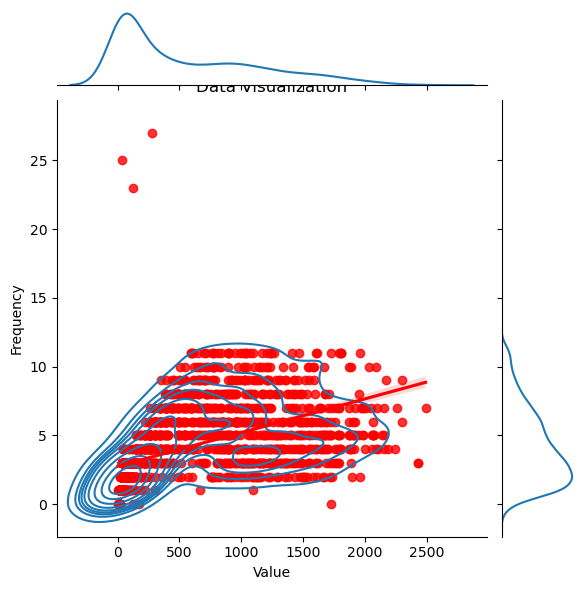

In [80]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde")
plt.title('Data Visualization')
x.plot_joint(sns.regplot, color = 'r')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(37.597222222222214, 0.5, 'Frequency')

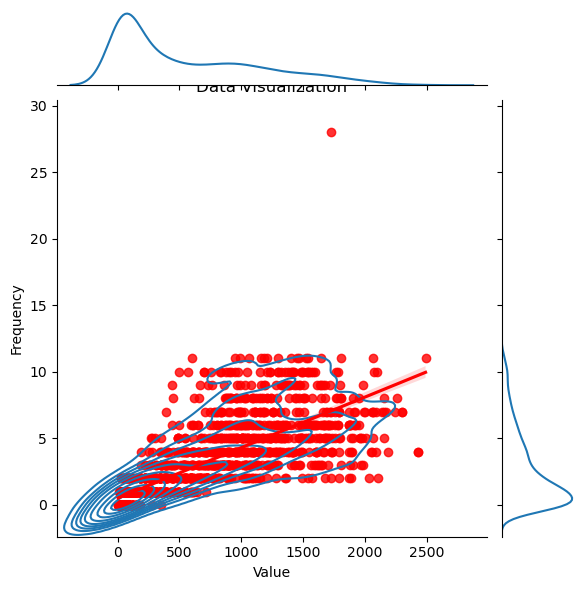

In [82]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = "kde")
plt.title('Data Visualization')
x.plot_joint(sns.regplot, color = 'r')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(37.597222222222214, 0.5, 'Frequency')

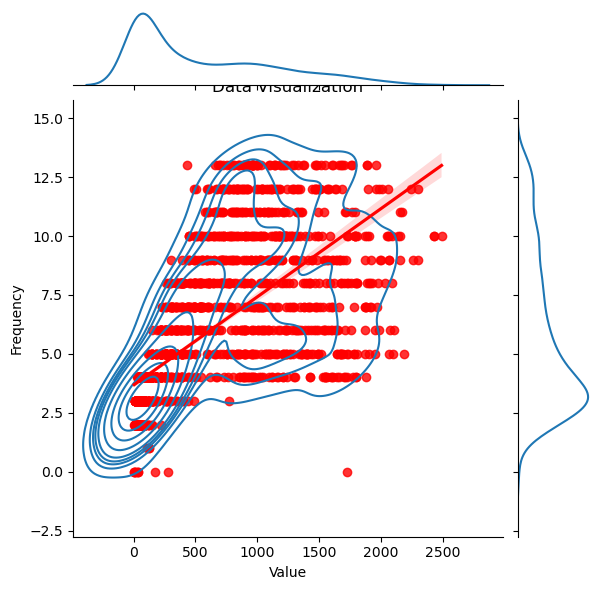

In [83]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = "kde")
plt.title('Data Visualization')
x.plot_joint(sns.regplot, color = 'r')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [84]:
# 2 directions: Boost up the higher percentage catalog customers. OR Focus on In Store/Web because they have more traffic

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

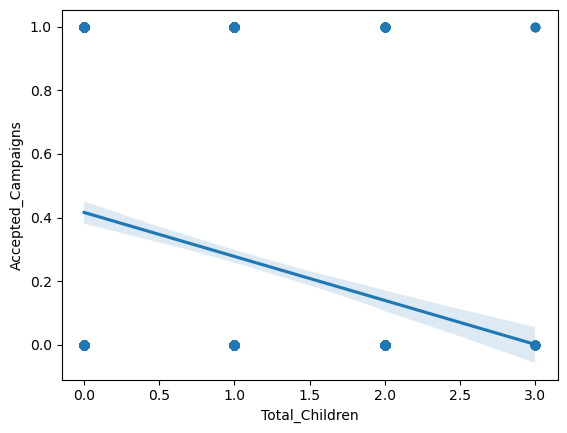

In [97]:
sns.regplot(x = 'Total_Children',y= 'Accepted_Campaigns', data = food)

In [99]:
# Less kids = More likely to accept campaign

In [101]:
sns.regplot(x = 'Education_Status',y= 'Accepted_Campaigns', data = food)

KeyError: 'Education_Status'

In [ ]:
sns.regplot(x = 'Education_Status',y= 'MntTotal', data = food)

In [ ]:
# Education isn't really significant in our segmentation

In [ ]:
sns.countplot(x = 'Marital_Status_str', data = food)

In [ ]:
sns.regplot(x = 'Marital_Status', y = 'Accepted_Campaigns',data = food)

In [ ]:
accpt = food[food['Accepted_Campaigns']!=0]
rel_food= food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

In [ ]:
plt.title('Data Visualization')
sns.barplot(x = 'Marital_Status_str',y = 'MntTotal', data = rel_food)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
plt.title('Data Visualization')
sns.barplot(x = 'Marital_Status_str',y = 'MntTotal', data = rel_food)
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
total =food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns']== 1]['Marital_Status_str'].value_counts()

In [ ]:
pect_marital = accepted / total * 100

In [ ]:
pect_food = pect_marital.reset_index()
pect_food.columns =['Marital_Status', 'Percentage']

NameError: name 'pect_food' is not defined

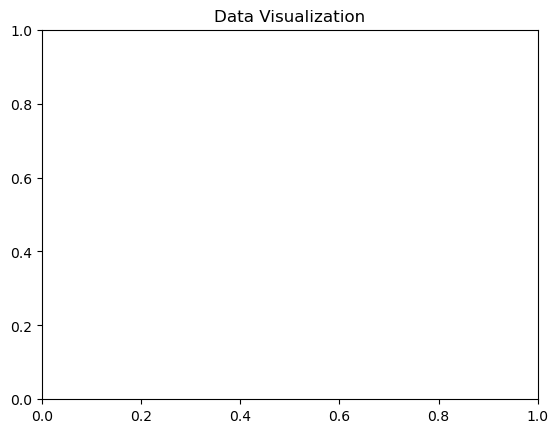

In [95]:
plt.title('Data Visualization')
sns.barplot(x='Marital_Status', y= 'Percentage', data = pect_food)
plt.xlabel('Marital_Status')
plt.ylabel('Percentage')

In [ ]:
# Married , single, togather are spending a lot more money than widow and divorced. We should focus on this segment

### OVERALL FINDINGS
1. Age 30-70 Where spending more money but less likely to accept campaigns. Higher volume here though.
2. Catalog was more likely to accept campaigns, but in person spends more. Recommend a split between all.
3. 40% catalog, 30 stor, 30 web
5. Focus on people with less kids
6. Education no impact dont target any group
7. Marital Status- doesnt play a big part. Married, Single, togather spend more money.

Money Making
1. Middle Aged people, high earner, with no kids. Target on different platforms with the split above.
New users to spend more money
2. Focus on 21-30, 70, and up who statistically accepted campaigns at a higher rate